<a href="https://colab.research.google.com/github/rezhaauliar/UTS-SLO-REZHA-AULIA/blob/main/UTS_SLO_Rezha_Aulia_Riyanda_2101202082.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/SLO-main/3scene-20210411T154500Z-001

/content/drive/MyDrive/SLO-main/3scene-20210411T154500Z-001


In [ ]:
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from PIL import ImageFilter
from imutils import paths
import numpy as np
import os

In [ ]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("3scene")
data = []
labels = []

[INFO] loading images...


In [ ]:
for imagePath in imagePaths:
  image=Image.open(imagePath)
  image=image.filter(ImageFilter.SMOOTH)
  image = image.filter(ImageFilter.SMOOTH_MORE)
  image=np.array(image.resize((128,128))) / 255.0
  data.append(image)
  label=imagePath.split(os.path.sep)[-2]
  labels.append(label)

In [ ]:
print(labels)

['coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 

In [ ]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [ ]:
print(labels)

[[1 0 0]
 [1 0 0]
 [1 0 0]
 ...
 [0 0 1]
 [0 0 1]
 [0 0 1]]


In [ ]:
print(np.array(data).shape)

(948, 128, 128, 3)


In [ ]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25)
print(trainX.shape)
print(testX.shape)

(711, 128, 128, 3)
(237, 128, 128, 3)


In [ ]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense, Dropout
model=Sequential(
    [
     Flatten(input_shape=(128*128*3,)),
     Dense(2048, activation="relu"),
     Dropout(0.3),
     Dense(1024, activation="relu"),
     Dropout(0.3),
     Dense(512, activation="relu"),
     Dropout(0.3),
     Dense(256, activation="relu"),
     Dropout(0.3),
     Dense(128, activation="relu"),
     Dropout(0.3),
     Dense(64, activation="relu"),
     Dense(3, activation="softmax"),

    ]
)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 49152)             0         
_________________________________________________________________
dense_14 (Dense)             (None, 2048)              100665344 
_________________________________________________________________
dropout_10 (Dropout)         (None, 2048)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dropout_11 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_12 (Dropout)         (None, 512)              

In [ ]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=325, batch_size=325)

[INFO] training network...
Epoch 1/325
3/3 [==============================] - 1s 180ms/step - loss: 5.4276 - accuracy: 0.3173 - val_loss: 5.1415 - val_accuracy: 0.3586
Epoch 2/325
3/3 [==============================] - 0s 88ms/step - loss: 10.6722 - accuracy: 0.3278 - val_loss: 1.8223 - val_accuracy: 0.3629
Epoch 3/325
3/3 [==============================] - 0s 80ms/step - loss: 7.1203 - accuracy: 0.3238 - val_loss: 1.3151 - val_accuracy: 0.3544
Epoch 4/325
3/3 [==============================] - 0s 78ms/step - loss: 5.6069 - accuracy: 0.3260 - val_loss: 1.1964 - val_accuracy: 0.3291
Epoch 5/325
3/3 [==============================] - 0s 83ms/step - loss: 4.1540 - accuracy: 0.3613 - val_loss: 1.0692 - val_accuracy: 0.3629
Epoch 6/325
3/3 [==============================] - 0s 77ms/step - loss: 3.3555 - accuracy: 0.3753 - val_loss: 1.2872 - val_accuracy: 0.3629
Epoch 7/325
3/3 [==============================] - 0s 80ms/step - loss: 2.7407 - accuracy: 0.3410 - val_loss: 1.2330 - val_accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


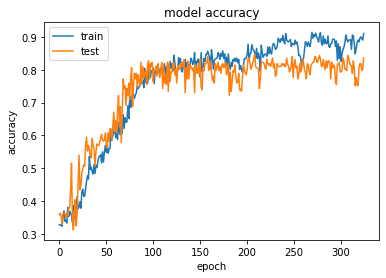

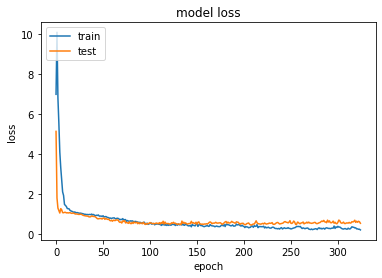

In [ ]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

       coast       0.77      0.90      0.83        86
      forest       0.95      0.84      0.89        85
     highway       0.81      0.76      0.78        66

    accuracy                           0.84       237
   macro avg       0.84      0.83      0.83       237
weighted avg       0.84      0.84      0.84       237

